In [ ]:
#Note: Write script in Python 2 for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem 1. UserSim

In [2]:
def UserSim(n, my_lambda):
    sim = list(np.random.exponential(1/float(my_lambda), n)) 
    return sim

In [3]:
np.random.seed(123)
my_sim = UserSim(1000, 2)
my_cum = np.cumsum(my_sim)

In [4]:
max(my_sim)

3.4146596874389639

In [5]:
x = [0.25,0.5,0.75,1,
     1.25,1.5,1.75,2,2.25,2.5,2.75,3]

In [6]:
y = []
for i in x:
    num = np.sum(np.array(my_sim) >= i)
    y.append(num)

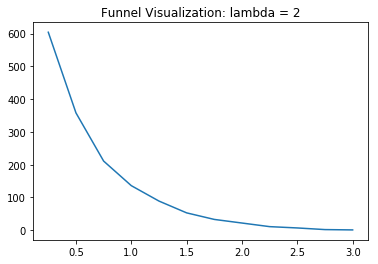

In [7]:
plt.plot(x,y)
plt.title('Funnel Visualization: lambda = 2')
plt.show()

In [8]:
lambdas = list(np.round(np.arange(0.2,3.2,0.2),2))

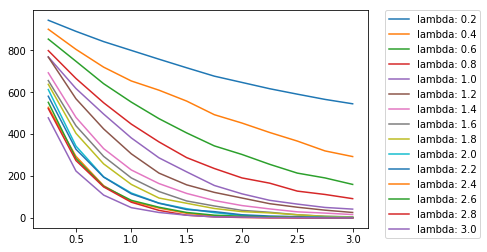

In [9]:

for l in lambdas:
    my_sim = UserSim(1000,l)
    y = []
    for i in x:
        num = np.sum(np.array(my_sim) >= i)
        y.append(num)
    plt.plot(x,y, label = 'lambda: {}'.format(l))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Survival time is the time a user stayed survive. 

- The bigger the $\lambda$ is, the steeper the slope is and the lower the line is in the gragh, which means less users are able to go through certain survival time threshold compared to that of lower $\lambda$'s.
- Under higher $\lambda$, with the increase of survival time threshold, the decline of number of users increases faster at the first, then slower down faster than that of lower $\lambda$'s.  

### Problem 2.  EstLam1

(a) Estimator is Unbiased means it is equal to expected value.

(b) 

In [10]:
np.random.seed(321)
my_sim = UserSim(n=1000, my_lambda=1)

In [11]:
lambda_hat = 1/np.mean(np.array(my_sim))
lambda_hat

0.98761944786844991

(c) 

In [12]:
np.random.seed(321)
alpha = 0.05
lambda_hat = []
for i in range(500):
    lambda_hat.append(1/np.mean(np.random.choice(my_sim, len(my_sim))))
    
lower_bound = np.percentile(lambda_hat, alpha * 100)
upper_bound = np.percentile(lambda_hat, (1-alpha) * 100)

print lower_bound, upper_bound

0.9397255474 1.03901722469


(d)

In [13]:
user_list = [100, 200, 500, 1000, 2000, 5000, 10000]
lambda_hat_list = []
lower_bound_list = []
upper_bound_list = []

for n_user in user_list:
    np.random.seed(n_user) # set seed
    my_sim = UserSim(n=n_user, my_lambda=1) #create simulation list
    lambda_hat_list.append(1/np.mean(np.array(my_sim))) # 
    
    lambda_hat = []
    for i in range(500):
        lambda_hat.append(1/np.mean(np.random.choice(my_sim, len(my_sim))))
    
    lower_bound_list.append(np.percentile(lambda_hat, alpha * 100))
    upper_bound_list.append(np.percentile(lambda_hat, (1-alpha) * 100))

        

In [14]:
pd.DataFrame({'user_list': user_list, 'lambda_estimate': lambda_hat_list, 
              'lower_bound_95%': lower_bound_list, 'upper_bound_95%': upper_bound_list}, 
              columns = ['user_list', 'lambda_estimate', 'lower_bound_95%', 'upper_bound_95%'])

,user_list,lambda_estimate,lower_bound_95%,upper_bound_95%
0,100,1.060998,0.890115,1.277365
1,200,0.901073,0.804855,1.013709
2,500,0.981209,0.912712,1.059862
3,1000,0.996095,0.944705,1.050735
4,2000,0.967197,0.937204,1.002924
5,5000,0.990232,0.967040,1.013109
6,10000,1.007073,0.990463,1.023862


As number of users increases, confidence interval gets shrinked. It means estimate results get convergered.

### Visulization 

In [15]:
# to be added...

### Problem 3. HurdleFun

In [16]:
np.random.seed(345)
my_sim_3 = UserSim(1000, 1) #choose which lambda?

In [43]:
my_sim_3[:3]

[0.46350756319147507, 1.0932792146913453, 0.68648542845572547]

In [17]:
break_point = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]

In [56]:
(my_sim_3[1] > break_point)

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False], dtype=bool)

In [19]:
sum(my_sim_3[1] > break_point)

4

In [85]:
# Input: my_sim_3, break_points
# Output: hould return a list of the number of users who fail to proceed beyond that break-point, 
# but did get to the previous break-point.
def HurdleFun(sim=my_sim_3, bp=break_point):
    user_steps = [] #number of steps that each user complete
    output = []
    for user in sim: 
        user_steps.append(np.argmin(np.array(bp) - user < 0 ))
    
    for i in range(len(bp)+1):
        output.append(sum(np.float64(i) == user_steps))
        
    return output

In [86]:
HurdleFun(my_sim_3, break_point)

[287, 184, 126, 95, 75, 48, 50, 38, 36, 33, 20, 8, 0]

In [88]:
HurdleFun(sim=[.20, .40], bp=[.25, .5])

[1, 1, 0]